# RFM Analysis in Python

RFM is a marketing technique used to group and analyze the value of customers based on three key characteristics: <b>Recency</b>, <b>Frequency</b>, <b>Monetary Value</b>
<br>This analysis is done to develop the appropriate marketing campaigns for each group of customers.</br>
<ol>
    <li><b><u>Recency</u></b> : How recently a customer has made a purchase.
        <br>If they made a purchase recently, the likelihood of them making another purchase is high.
        <br>However, if the customer hasn't made a purchase in a while, you may need to bring them back with new promotional offers.
    </li>
    <li><b><u>Frequency</u></b> : How often a customer makes a purchase.
    <br>If they purchase often, you will know their spending habits and preferences. 
    <br>If they make one purchase and never return, they could be a good candidate for a customer satisfaction survey.
    </li>
    <li><b><u>Monetary Value</u></b> : How much money a customer spends on purchases
        <br>All purchases are valuable. But if a customer has many recent purchases at a high price point,
        <br>you have a valuable returning customer with the potential of becoming a brand loyalist.
        <br>However, if a customers' recent purchases are at a low price point, perhaps cross-selling may help increase their spending.
    </li>
</ol>


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import re
import json

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df = pd.read_csv('superstoresales.csv', encoding = "Latin-1")

# Data Cleaning and Preparation

In [3]:
# Modify column names: lower case characters and replace white space " " with an underscore "_"
df.columns = [col.lower() for col in df.columns]
df.columns = [col.replace(' ', '_') for col in df.columns]

In [4]:
# Format customer_id by adding zeros and removing digits where required
# Keep in mind that the customer_id's last digits are unique (at max the last four digits)
def clean_customer_id(customer_id):
    modify_customer_id = re.split(r"[-]", customer_id)
    if(len(modify_customer_id[1]) < 3):
        two_zero_padding = modify_customer_id[0] + '-' + modify_customer_id[1].rjust(2+len(modify_customer_id[1]), '0')
        return two_zero_padding
    elif(len(modify_customer_id[1]) < 4):
        one_zero_padding =  modify_customer_id[0] + '-' + modify_customer_id[1].rjust(1+len(modify_customer_id[1]), '0')
        return one_zero_padding
    elif(len(modify_customer_id[1]) == 4):
        none_zero_padding =  modify_customer_id[0] + '-' + modify_customer_id[1]
        return none_zero_padding
    elif(len(modify_customer_id[1]) == 5):
        shorten_to_four_digits =  modify_customer_id[0] + '-' + modify_customer_id[1][1:]
        return shorten_to_four_digits

# Apply clean_customer_id function and update column
df['customer_id'] = df['customer_id'].apply(clean_customer_id)

In [5]:
# Change date format: changes dates in the form of (d-m-Y) to (m/d/Y)
def clean_dates(dates):
    if(re.search('\-.*', dates)):
        date_split = re.split(r'[-]',dates)
        clean_date = date_split[1].lstrip('0') + '/' + date_split[0] + '/'+date_split[2]
        return clean_date
    else:
        return dates

# Apply clean_dates function and update columns
df['order_date'] = df['order_date'].apply(clean_dates)
df['ship_date'] = df['ship_date'].apply(clean_dates)

# Changes dates to datetime
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date']) 

In [6]:
# Removes duplicates
df = df.drop_duplicates()

In [7]:
# Check min and max dates of columns "order_date" and "ship_date"
print('Oldest date for order_date column: ' + str(df['order_date'].min()))
print('Most recent date for order_date column: ' + str(df['order_date'].max()))
print('Oldest date for ship_date column: ' + str(df['ship_date'].min()))
print('Most recent date for ship_date column: ' + str(df['ship_date'].max()))

Oldest date for order_date column: 2011-01-01 00:00:00
Most recent date for order_date column: 2014-12-31 00:00:00
Oldest date for ship_date column: 2011-01-02 00:00:00
Most recent date for ship_date column: 2015-07-01 00:00:00


In [8]:
# Grouping and Aggregating the data: Group data by customer_id and aggregate order_id by counting, order_date by the max date and sales by the sum of sales
agg_dict = {'order_id': 'count', 'order_date': 'max', 'sales': 'sum'}
df_rfm = df.groupby('customer_id').agg(agg_dict).reset_index()
df_rfm.columns = ['customer_id', 'frequency', 'most_recent_order', 'monetary'] #column labels
df_rfm.head()

,customer_id,frequency,most_recent_order,monetary
0,AA-0315,50,2014-12-29,"15,990.67"
1,AA-0375,55,2014-12-25,"6,538.69"
2,AA-0480,48,2014-09-05,"19,759.08"
3,AA-0645,91,2014-12-05,"17,312.21"
4,AB-0015,89,2014-12-15,"24,644.63"


In [9]:
# Add recency column to the table: the most recent order will be subtracted to the first order of the table
# The higher the recency, the most recent the order
df_rfm['recency'] =  (df_rfm['most_recent_order'] - df["order_date"].min()).dt.days
df_rfm.head()

,customer_id,frequency,most_recent_order,monetary,recency
0,AA-0315,50,2014-12-29,"15,990.67",1458
1,AA-0375,55,2014-12-25,"6,538.69",1454
2,AA-0480,48,2014-09-05,"19,759.08",1343
3,AA-0645,91,2014-12-05,"17,312.21",1434
4,AB-0015,89,2014-12-15,"24,644.63",1444


In [10]:
# Join all the data needed
df_rfm = df_rfm[['customer_id', 'recency', 'frequency', 'monetary']]
df_rfm.head()

,customer_id,recency,frequency,monetary
0,AA-0315,1458,50,"15,990.67"
1,AA-0375,1454,55,"6,538.69"
2,AA-0480,1343,48,"19,759.08"
3,AA-0645,1434,91,"17,312.21"
4,AB-0015,1444,89,"24,644.63"


# Visualize Outliers

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

recency: 


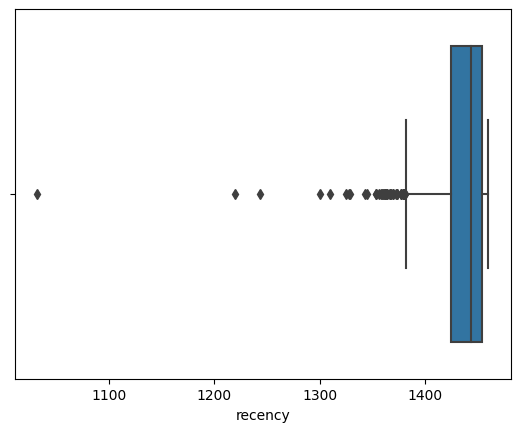

frequency: 


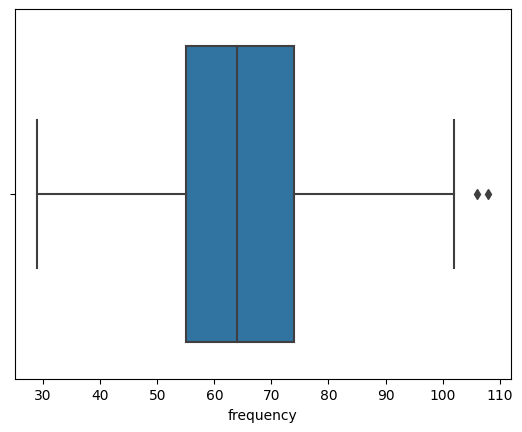

monetary: 


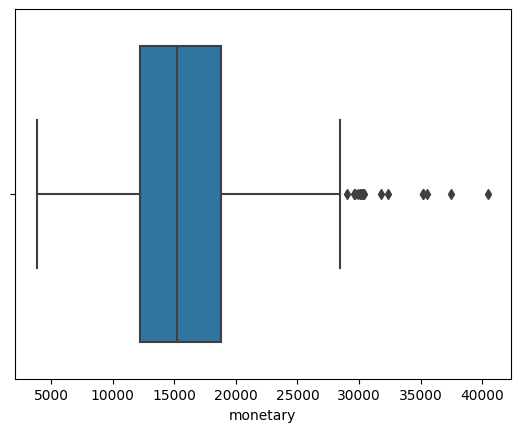

In [12]:
# Plot to visualize outliers: all three have outliers that need to be removed.
rfm_list = ['recency','frequency','monetary']
for i in rfm_list:
    print(str(i)+': ')
    ax = sns.boxplot(x = df_rfm[str(i)])
    plt.show()

# Filter Outliers

In [13]:
from scipy import stats
import numpy as np

<h4><b>Z scores</b></h4>
 
<ul>
<li>The z-score is a score that measures how many standard deviations a data point is away from the mean.</li>
<li>The z-score allows us to determine how usual or unusual a data point is in a distribution</li>
<li>The z-score must be used with a normal distribution, which is one of the prerequisites for calculating a standard deviation.</li>
<li>In a normal distribution, over 99% of values fall within 3 standard deviations from the mean.
    Because of this, we can assume that if a z-score returned is larger than 3, that the value is quite unusual.</li>
</ul>

In [14]:
# ---Remove outliers---
# Keep data 3 standard deviations from the mean, remove the rest
df_rfm_updated = df_rfm[['recency','frequency','monetary']]
z_scores = stats.zscore(df_rfm_updated )
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3 ).all(axis=1)
df_rfm_updated  = df_rfm_updated [filtered_entries]

recency: 


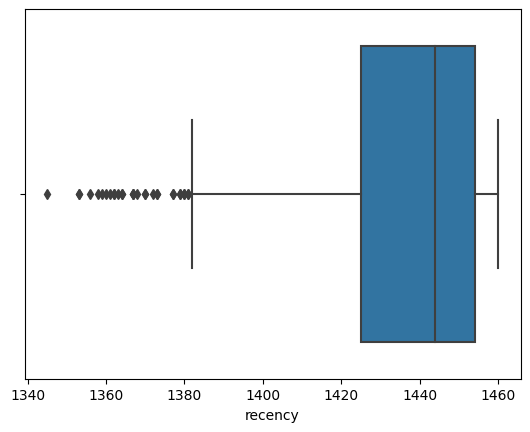

frequency: 


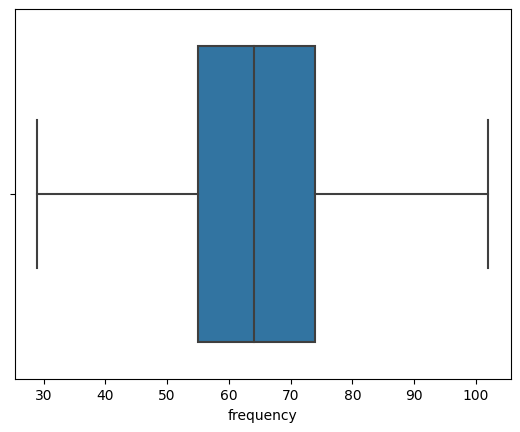

monetary: 


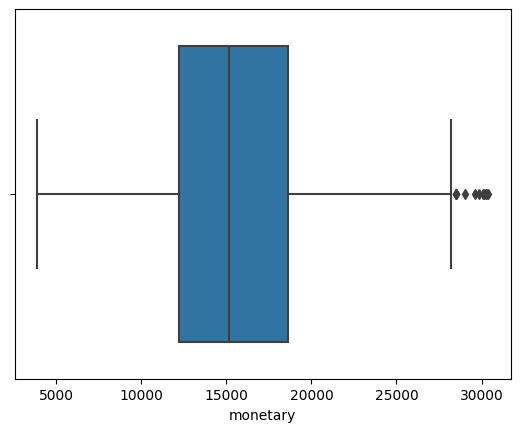

In [15]:
# Plot to visualize removal of outliers: outliers 3 standard deviations from the mean were removed
rfm_list = ['recency','frequency','monetary']
for i in rfm_list:
    print(str(i)+': ')
    ax = sns.boxplot(x = df_rfm_updated[str(i)])
    plt.show()

# Standardization

In [16]:
# ---Standardization of Values---
col_names = ['recency', 'frequency', 'monetary']
z_scores = stats.zscore(df_rfm_updated)
standardized_df = pd.DataFrame(z_scores, columns=col_names)

# K-Means Clustering Algorithm (Elbow Method and Silhouette Score)

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

<h3>Elbow Method</h3>
The Elbow method is a popular technique and the idea is to run k-means clustering for a range of clusters k (let’s say from 1 to 10) and for each value, 
<br>we are calculating the sum of squared distances from each point to its assigned center</br>

In [18]:
SSE = [] # SSE (sum of the squared error) list holds the values for each k
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++') # Number of clusters to form as well as the number of centroids 
    kmeans.fit(standardized_df) # Compute k-means clustering on data
    SSE.append(kmeans.inertia_) # Sum of squared distances of samples to their closest cluster center

Text(0, 0.5, 'Sum of Squared Distances')

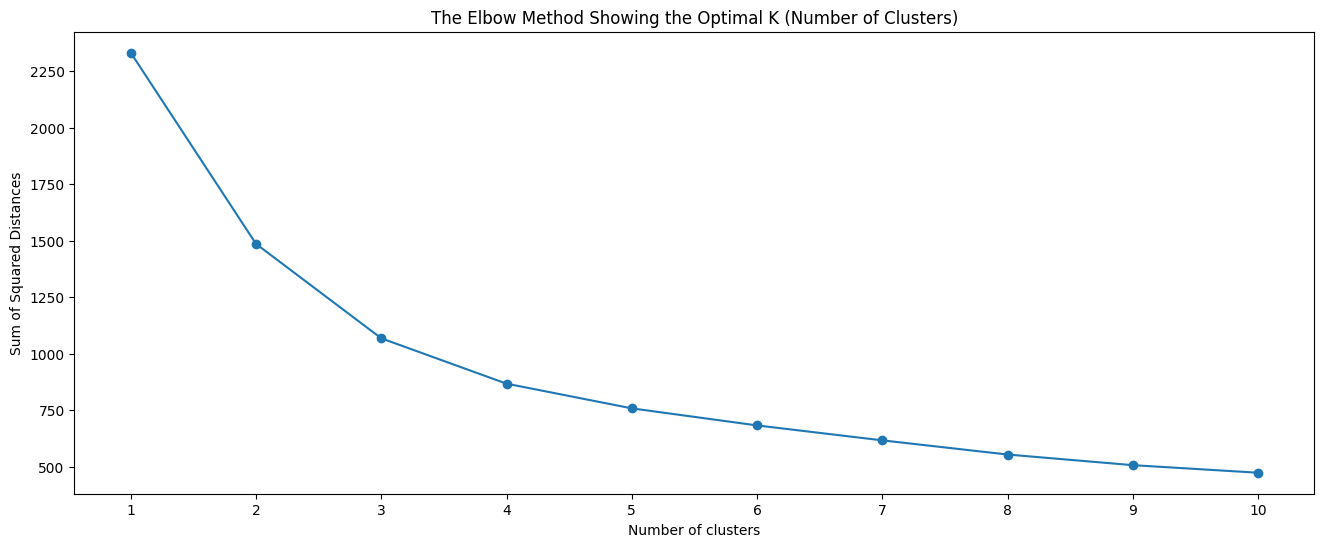

In [19]:
# ---Visualize Elbow Method---
frame = pd.DataFrame({'Cluster': range(1,11), 'SSE': SSE}) # converting the results into a dataframe and plotting them
plt.figure(figsize = (16,6))
plt.plot(frame['Cluster'], frame['SSE'], marker = 'o')
plt.title('The Elbow Method Showing the Optimal K (Number of Clusters)')
plt.xlabel('Number of clusters')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.ylabel('Sum of Squared Distances')

<h4>From the graph, one can determine that the "Elbow" of the graph occurs when the number of clusters is three</h4>

<h4>To verify and confirm the "Elbow" of the graph is 3, KneeLocator is used below</h4>

In [20]:
from kneed import KneeLocator

In [21]:
# To verify and confirm the "Elbow" of the graph is 3, KneeLocator is used
kl = KneeLocator(
    range(1, 11), SSE, curve = 'convex', direction = 'decreasing'
)
print("Optimal K(Number of Clusters): " + str(kl.elbow) + " clusters")

Optimal K(Number of Clusters): 3 clusters


In [22]:
# Build a model with 3 clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
kmeans.fit(standardized_df)

KMeans(n_clusters=3)

<h4>Silhouette Score</h4>
To evaluate the performance of this model, the silhouette coefficient will be used. 
<br>The Silhouette score is a value that ranges from -1 to +1.</br>
A higher Silhouette score is indicative of a better model.

In [23]:
# ---Silhouette Score---
print('The Silhouette Score is ' + str(silhouette_score(standardized_df, kmeans.labels_, metric = 'euclidean')))

The Silhouette Score is 0.34812738251616515


# Segmentation RFM Model 

In [24]:
# ---Segmentation Model---
pred = kmeans.predict(standardized_df) # Predict the closest cluster each sample belongs to
frame = pd.DataFrame(df_rfm_updated)
frame['cluster'] = pred

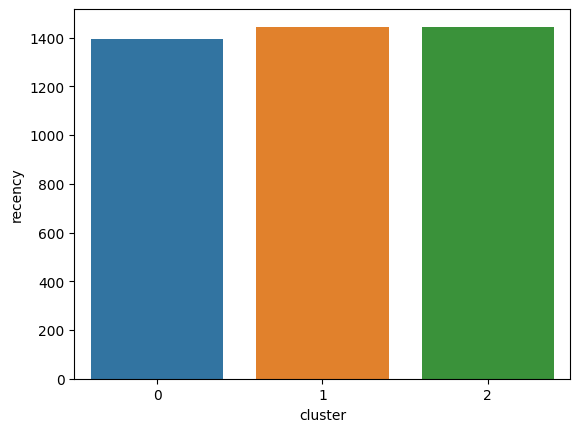

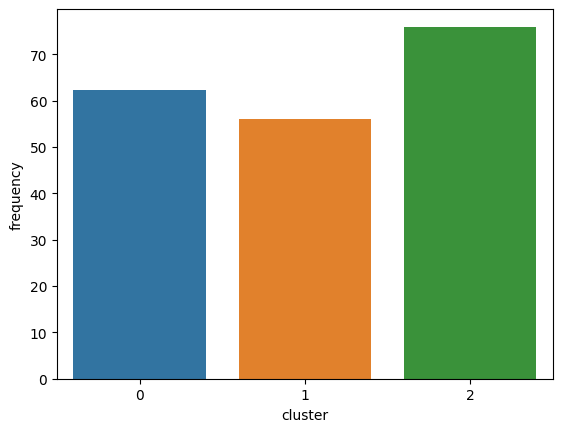

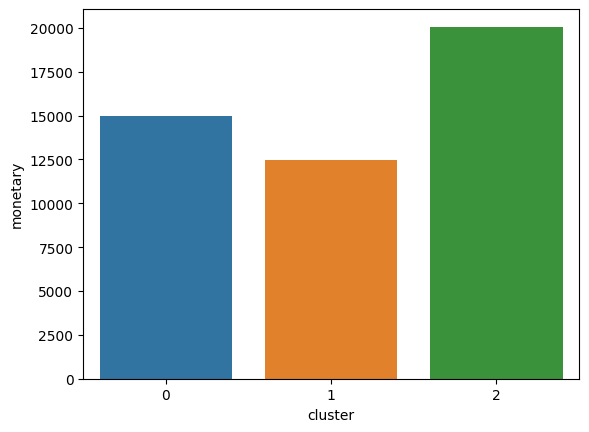

In [25]:
avg_df = frame.groupby(['cluster'], as_index = False).mean()
for i in rfm_list :
    sns.barplot(x = 'cluster', y = str(i), data = avg_df)
    plt.show()

# Interpretation of Segments

<h2><u>Cluster 0</u></h2>
Customers in this segment spend more and purchase more than the customers in segment 1 but have not shopped recently.
<br>This segment has the lowest recency when compared to the rest of the segments.</br> 
If this trend continues, it will mean that customers are being lost.
<br>Keeping customers is essential, promoting special offers to this segment of customers might entice them to shop more often.</br>

<h2>Cluster 1</h2>
Customers in this segment spend the less, do not spend often but have shopped recently.
<br>This indicates that customers in this segment make occasional small purchases but are still actively shopping.</br>
Promoting cross-selling, specially to this segment of customers, might lead to a higher number 
<br>of sales, since there is still potential for growth.</br>

<h2>Cluster 2</h2>
Customers in this segment spend the most, spend often and have shopped recently. 
<br>This indicates that customers in this segment are likely to make multiple purchases</br>
in a single order and are highly responsive to cross-selling and promotions. These are considered loyal customers.